In [4]:
import sys
sys.path.append('../src')

import torch
import numpy as np
import pandas as pd
import librosa as lr
import seaborn as sns
import librosa.display as lrd
import matplotlib.pyplot as plt

from dataset import NsynthDataset
from utils import get_preprocessing, get_dataloader

/home/rmiccini/miniconda3/envs/mir2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Test dataset

In [5]:
sr = 16000
duration = 4

In [6]:
preproc_train = get_preprocessing(train=True, log_transform=True)
ds_train = NsynthDataset('/home/rmiccini/stanford_mir2/data/nsynth-train', sr=sr, duration=duration, pitches=[60], transform=preproc_train, label='full')
sample, labels = ds_train[0]

In [7]:
preproc_train

Compose(
    MelSpectrogram(
  (spectrogram): Spectrogram()
  (mel_scale): MelScale()
)
    AmplitudeToDB()
)

In [8]:
sample.shape

torch.Size([1, 80, 251])

In [9]:
labels

{'note': 55602,
 'sample_rate': 16000,
 'pitch': 60,
 'instrument_source': 0,
 'instrument_family_str': 'brass',
 'instrument_str': 'brass_acoustic_009',
 'note_str': 'brass_acoustic_009-060-100',
 'instrument_source_str': 'acoustic',
 'velocity': 100,
 'instrument_family': 1,
 'instrument': 'acoustic brass'}

In [10]:
classes = ds_train.df['instrument_source_str'].str.cat(ds_train.df['instrument_family_str'], sep=' ').unique()
n_classes = len(classes)
n_classes, classes

(28,
 array(['acoustic brass', 'electronic keyboard', 'acoustic mallet',
        'synthetic bass', 'electronic organ', 'acoustic guitar',
        'acoustic string', 'electronic guitar', 'electronic bass',
        'acoustic reed', 'synthetic vocal', 'electronic mallet',
        'acoustic flute', 'electronic string', 'acoustic keyboard',
        'synthetic guitar', 'acoustic bass', 'acoustic vocal',
        'electronic vocal', 'synthetic synth_lead', 'acoustic organ',
        'synthetic keyboard', 'synthetic mallet', 'synthetic reed',
        'synthetic flute', 'electronic reed', 'electronic brass',
        'electronic flute'], dtype=object))

# Test dataloader

In [23]:
dl_train = get_dataloader(ds_train, batch_size=16)
sample_batch, labels_batch = next(iter(dl_train))

In [24]:
sample_batch.shape

torch.Size([16, 1, 80, 251])

In [25]:
labels_batch = {k: (v if isinstance(v, list) else v.tolist()) for k, v in labels_batch.items() if k != 'qualities'}
pd.DataFrame(labels_batch)

,note,sample_rate,pitch,instrument_source,instrument_family_str,instrument_str,note_str,instrument_source_str,velocity,instrument_family,instrument
0,55602,16000,60,0,brass,brass_acoustic_009,brass_acoustic_009-060-100,acoustic,100,1,acoustic brass
1,300987,16000,60,1,keyboard,keyboard_electronic_016,keyboard_electronic_016-060-127,electronic,127,4,electronic keyboard
2,125691,16000,60,0,mallet,mallet_acoustic_019,mallet_acoustic_019-060-050,acoustic,50,5,acoustic mallet
3,274375,16000,60,1,keyboard,keyboard_electronic_081,keyboard_electronic_081-060-127,electronic,127,4,electronic keyboard
4,250337,16000,60,2,bass,bass_synthetic_048,bass_synthetic_048-060-100,synthetic,100,0,synthetic bass
5,185407,16000,60,1,organ,organ_electronic_029,organ_electronic_029-060-025,electronic,25,6,electronic organ
6,147541,16000,60,0,guitar,guitar_acoustic_019,guitar_acoustic_019-060-075,acoustic,75,3,acoustic guitar
7,29630,16000,60,0,string,string_acoustic_084,string_acoustic_084-060-050,acoustic,50,8,acoustic string
8,233190,16000,60,2,bass,bass_synthetic_093,bass_synthetic_093-060-025,synthetic,25,0,synthetic bass
9,132234,16000,60,1,guitar,guitar_electronic_023,guitar_electronic_023-060-025,electronic,25,3,electronic guitar


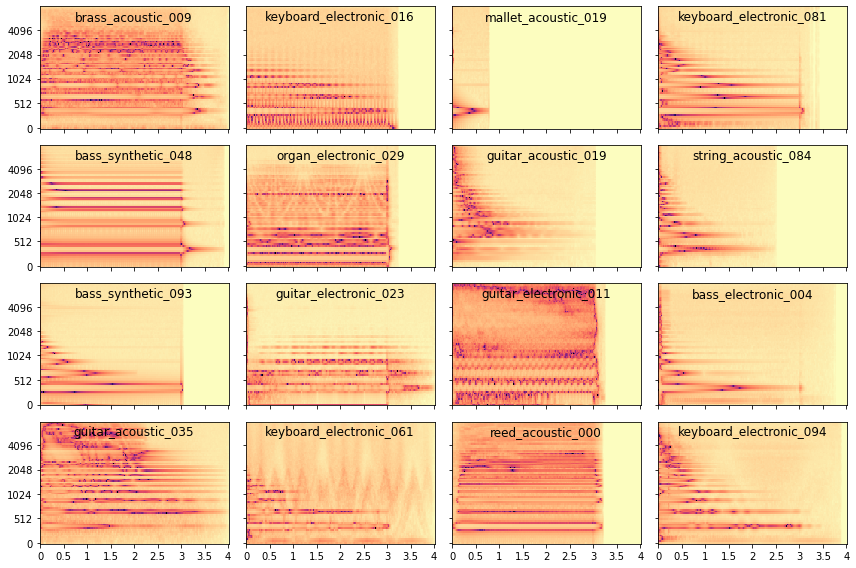

In [30]:
fig, axs = plt.subplots(4, 4, figsize=(12, 8), sharex='col', sharey='row')

for x, title, ax in zip(sample_batch, labels_batch['instrument_str'], axs.flatten()):
    y = lr.amplitude_to_db(np.abs(x.numpy()), ref=1)
    lrd.specshow(y[0], ax=ax, cmap='magma', sr=sr, win_length=1024, hop_length=256, x_axis='s', y_axis='mel')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title, y=1.0, pad=-14, color='k')
fig.tight_layout()
plt.show()

# extract mean and std from training data

In [ ]:
ds_train.get_statistics()

In [11]:
from tqdm import tqdm

all_data = []
for i in tqdm(range(len(ds_train))):
    sample, _ = ds_train[i]
    all_data.append(sample)
all_data = torch.stack(all_data)
all_data.shape

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4258/4258 [00:16<00:00, 257.04it/s]


torch.Size([4258, 1, 80, 251])

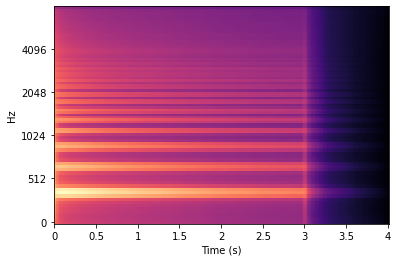

In [26]:
data_mean = all_data.mean(0).detach().cpu()
lrd.specshow(data_mean.numpy()[0], cmap='magma', sr=sr, win_length=1024, hop_length=256, x_axis='s', y_axis='mel')
torch.save(data_mean, '../data_mean.pt')

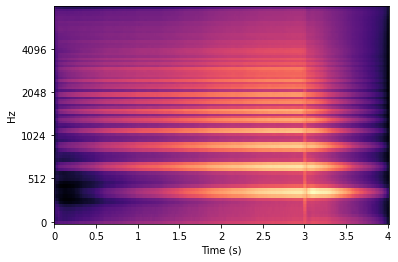

In [27]:
data_std = all_data.std(0).detach().cpu()
lrd.specshow(data_std.numpy()[0], cmap='magma', sr=sr, win_length=1024, hop_length=256, x_axis='s', y_axis='mel')
torch.save(data_std, '../data_std.pt')

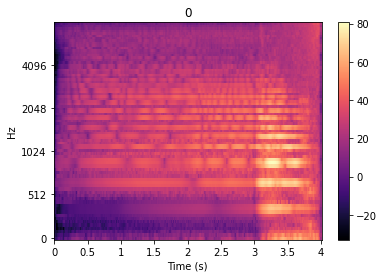

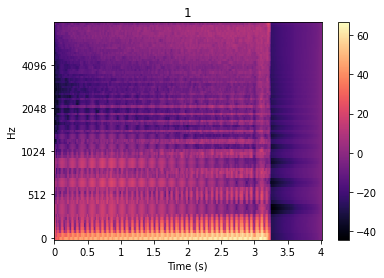

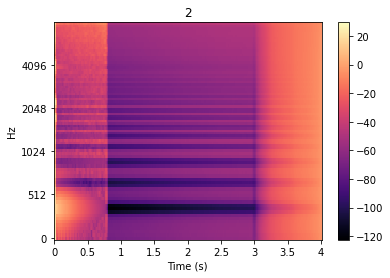

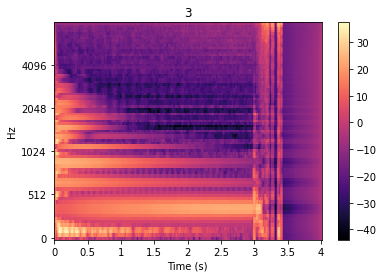

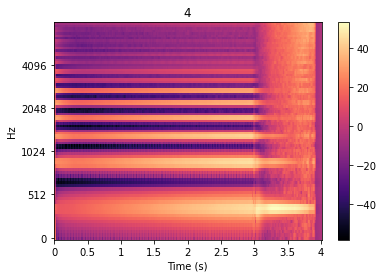

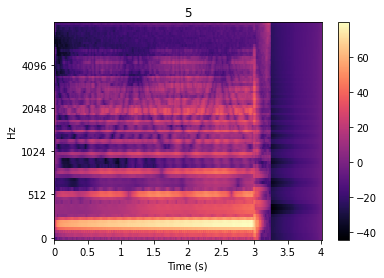

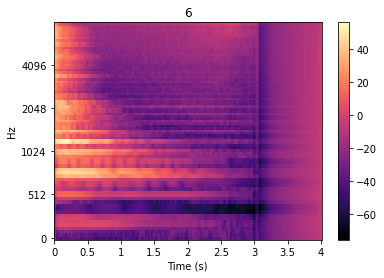

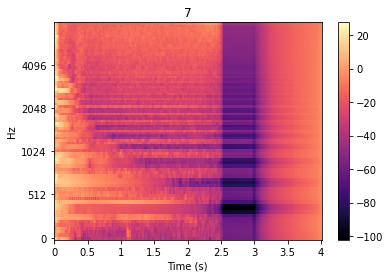

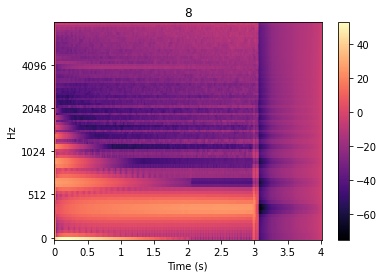

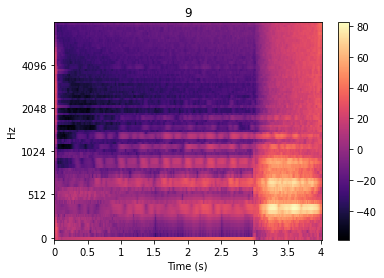

In [19]:
for i in range(10):
    aaa = all_data[i,0].numpy() - data_mean
    lrd.specshow(aaa, cmap='magma', sr=sr, win_length=1024, hop_length=256, x_axis='s', y_axis='mel')
    plt.title(str(i))
    plt.colorbar()
    plt.show()

In [ ]:
ds_train[5][1]

{'note': 185407,
 'sample_rate': 16000,
 'pitch': 60,
 'instrument_source': 1,
 'instrument_family_str': 'organ',
 'instrument_str': 'organ_electronic_029',
 'note_str': 'organ_electronic_029-060-025',
 'instrument_source_str': 'electronic',
 'velocity': 25,
 'instrument_family': 6,
 'instrument': 'electronic organ'}